C:\Users\Zach\AppData\Local\Temp\ipykernel_27344\3563778213.py:163: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


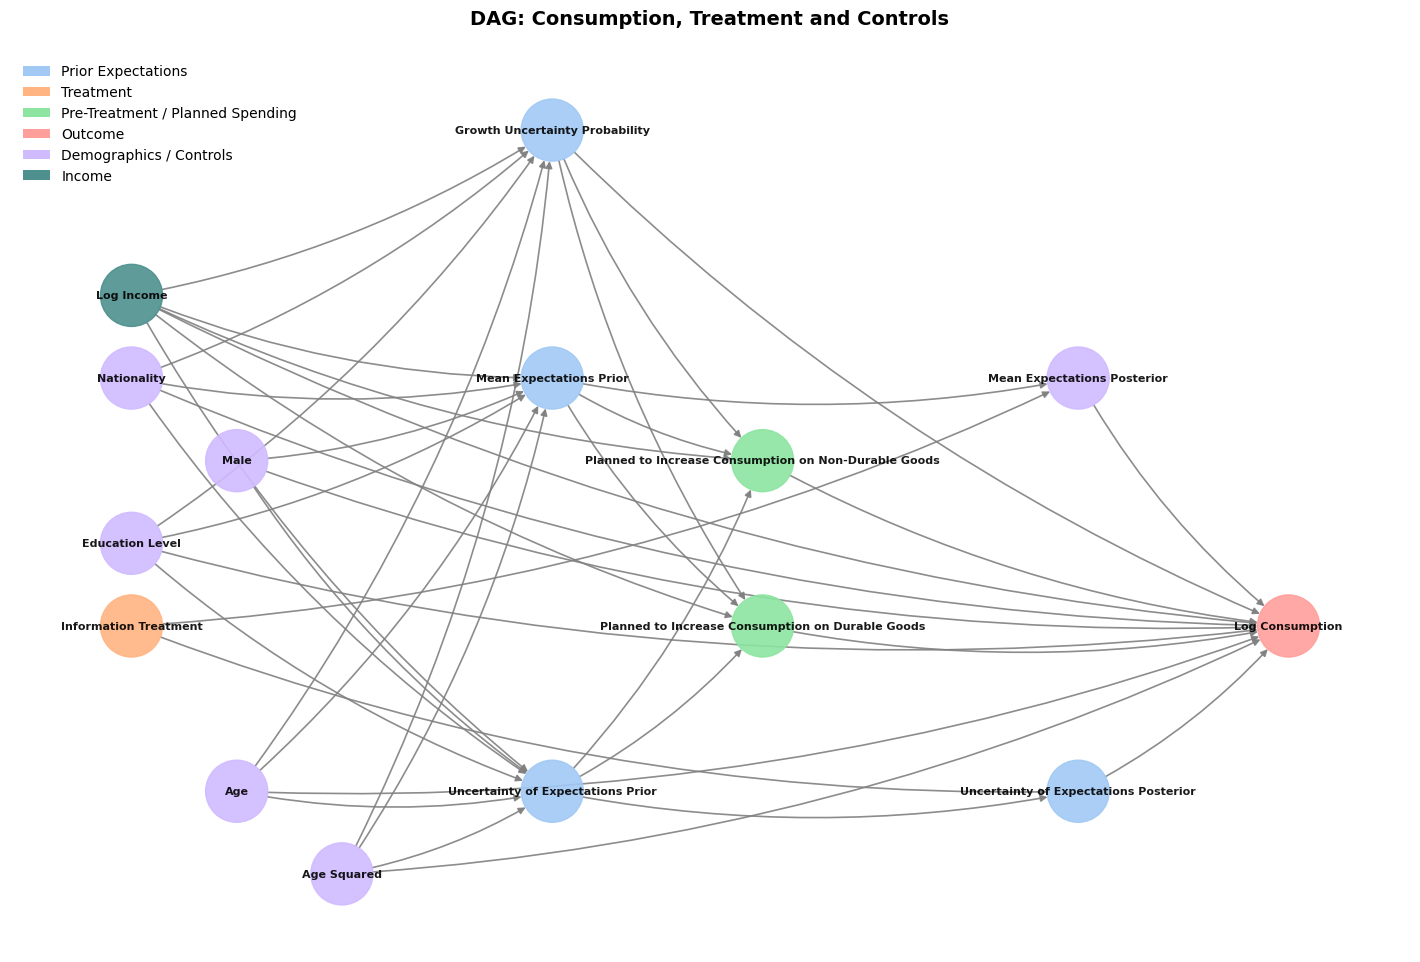

<Figure size 640x480 with 0 Axes>

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# === DAG GML with consolidated variables ===
dag_gml_pub = """graph [
  directed 1

  node [id 0 label "Log Consumption"]
  node [id 1 label "Information Treatment"]
  node [id 2 label "Male"]
  node [id 3 label "Age"]
  node [id 4 label "Age Squared"]
  node [id 5 label "Education Level"]
  node [id 6 label "Nationality"]
  node [id 7 label "Mean Expectations Prior"]
  node [id 8 label "Uncertainty of Expectations Prior"]
  node [id 9 label "Growth Uncertainty Probability"]
  node [id 10 label "Planned to Increase Consumption on Non-Durable Goods"]
  node [id 11 label "Planned to Increase Consumption on Durable Goods"]
  node [id 12 label "Mean Expectations Posterior"]
  node [id 13 label "Uncertainty of Expectations Posterior"]
  node [id 14 label "Log Income"]

  # Demographics & Treatment → Consumption
  edge [source 1 target 12]
  edge [source 1 target 13]
  edge [source 2 target 0]
  edge [source 3 target 0]
  edge [source 4 target 0]
  edge [source 5 target 0]
  edge [source 6 target 0]
  edge [source 4 target 9]
  edge [source 5 target 9]
  edge [source 6 target 9]  
  edge [source 3 target 9]  
  edge [source 3 target 7]
  edge [source 4 target 7]
  edge [source 3 target 8]
  edge [source 4 target 8]
  edge [source 2 target 7]
  edge [source 5 target 7]
  edge [source 6 target 7]
  edge [source 2 target 8]
  edge [source 5 target 8]
  edge [source 6 target 8]
  edge [source 12 target 0]
  edge [source 13 target 0]
  edge [source 14 target 0]
  edge [source 14 target 7]
  edge [source 14 target 8]
  edge [source 14 target 9]
  edge [source 14 target 10]
  edge [source 14 target 11]

  # Priors & Growth Uncertainty → Consumption
  edge [source 7 target 12]
  edge [source 8 target 13]
  edge [source 9 target 0]

  # Priors & Growth Uncertainty → Planned Spending
  edge [source 7 target 10]
  edge [source 8 target 10]
  edge [source 9 target 10]
  edge [source 7 target 11]
  edge [source 8 target 11]
  edge [source 9 target 11]

  # Planned Spending → Consumption
  edge [source 10 target 0]
  edge [source 11 target 0]
]"""

# === Parse graph ===
graph = nx.parse_gml(dag_gml_pub)

# === Color groups ===
group_colors = {
    "Prior": "#A1C9F4",        # light blue
    "Treat": "#FFB482",        # orange
    "Post": "#8DE5A1",         # green
    "Outcome": "#FF9F9B",      # pink
    "Log Income": "#4D908E",      # teal (unique for income)
    "Other": "#D0BBFF"         # demographics / controls
}


# Assign colors
node_colors = []
for node in graph.nodes():
    label = str(node)

    if "Log Income" in label:
        node_colors.append(group_colors["Log Income"])
    elif "Prior" in label or "Uncertainty" in label or "Growth" in label:
        node_colors.append(group_colors["Prior"])
    elif "Treatment" in label:
        node_colors.append(group_colors["Treat"])
    elif "Planned" in label:
        node_colors.append(group_colors["Post"])
    elif label == "Log Consumption":
        node_colors.append(group_colors["Outcome"])
    else:
        node_colors.append(group_colors["Other"])

# === Manual layout for publication-quality ===
pos = {
    # Left: Demographics & Treatment
    "Information Treatment": (-3.5, 0),
    "Male": (-3, 1),
    "Age": (-3, -1),
    "Age Squared": (-2.5, -1.5),
    "Education Level": (-3.5, 0.5),
    "Nationality": (-3.5, 1.5),
    "Log Income": (-3.5, 2),

    # Middle Top: Priors / Uncertainty
    "Mean Expectations Prior": (-1.5, 1.5),
    "Uncertainty of Expectations Prior": (-1.5, -1),
    "Growth Uncertainty Probability": (-1.5, 3),

    # Middle Bottom: Planned Spending
    "Planned to Increase Consumption on Non-Durable Goods": (-0.5, 1),
    "Planned to Increase Consumption on Durable Goods": (-0.5, 0),
    
    "Mean Expectations Posterior": (1, 1.5),
    "Uncertainty of Expectations Posterior": (1, -1),

    # Right: Outcome
    "Log Consumption": (2, 0)
}

# === Plot DAG ===
plt.figure(figsize=(14, 9))
nx.draw(
    graph,
    pos,
    with_labels=True,
    node_size=2000,
    node_color=node_colors,
    font_color="black",
    font_size=8,
    font_weight="bold",
    edge_color="gray",
    width=1.2,
    alpha=0.9,
    connectionstyle="arc3,rad=0.1"
)

# === Legend ===
legend_elements = [
    Patch(facecolor=group_colors["Prior"], label="Prior Expectations"),
    Patch(facecolor=group_colors["Treat"], label="Treatment"),
    Patch(facecolor=group_colors["Post"], label="Pre-Treatment / Planned Spending"),
    Patch(facecolor=group_colors["Outcome"], label="Outcome"),
    Patch(facecolor=group_colors["Other"], label="Demographics / Controls"),
    Patch(facecolor=group_colors["Log Income"], label="Income")
]
plt.legend(handles=legend_elements, loc="upper left", frameon=False)

plt.title("DAG: Consumption, Treatment and Controls", fontsize=14, fontweight="bold", pad=20)
plt.axis("off")
plt.tight_layout()
plt.savefig("dag_publication_ready.pdf", dpi=300, bbox_inches="tight")
plt.show()

OUT_PDF = "P2_DAG.pdf"
plt.savefig(OUT_PDF, dpi=300)